## Homework 1

a) How many Vendors are used in each country?

b) What is the average number of Developers in all the repositories and What is the average number of Repositories in all the Projects?

c) Which are the Top 3 Suppliers in terms of Billable Coding Effort (CE) Delivered per developer?

d) Which is the Project with a maximum number of Billable CE hours per day delivered per developer?

e) What is the difference on the total Actual CE delivered between July and August in Country 17?

f) What is the total number of developers in each one of the last 3 months for Vendor-002?

g) What Percentage of the total projects working with Java Files?

h) What is the most common task type in Repository 642?

## a) What is the most common task type in Repository 642?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

calendar=pd.read_csv('Calendar.csv')
filetype=pd.read_csv('FileType.csv')
task=pd.read_csv('Task.csv')
universe=pd.read_csv('Universe.csv')

In [115]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### First let's check the InfraID corresponding to Repository 642

In [2]:
universe[universe['Repository']=='Repo 642']

,Enterprise,OrgName,Project,Collection,InfraId,Repository,Type
7312,Client X,Org E,Project 164,Collection 426,41583,Repo 642,Subversion


### From the above query result, we can get the InfraID corresponding to Repo 642, using InfraID= 41583, we can get the most common task type in Repository 642

In [3]:
filtered_data=task[task['InfraId']==41583]
filtered_data=pd.DataFrame(filtered_data['Task Type'].value_counts())
filtered_data

,Task Type
null,107
Improvement,31
Bug,6
New Feature,4
Task,3


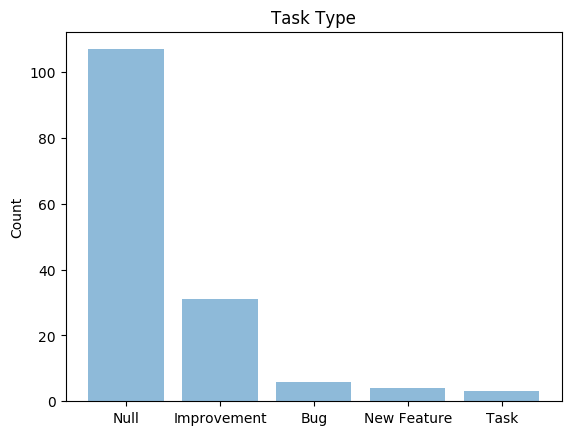

In [122]:
plt.rcdefaults()
 
Tasks = ('Null','Improvement', 'Bug', 'New Feature','Task')
y_pos = np.arange(len(Tasks))
Task_number = [107,31,6,4,3]
 
plt.bar(y_pos,Task_number, align='center', alpha=0.5)
plt.xticks(y_pos, Tasks)
plt.ylabel('Count')
plt.title('Task Type')
 
plt.show()

### From the above result, we can understand that the most common Task Type is 'Improvement'.

## b) How many Vendors are used in each country?

In [4]:
filtered_data=calendar.groupby(['Country','Supplier'],as_index=False).agg({'Billable CE':'sum'})
filtered_data=filtered_data.groupby('Country',as_index=False).count()
filtered_data=filtered_data[['Country','Supplier']]
filtered_data.columns=['Country','Number of Vendors']
filtered_data

,Country,Number of Vendors
0,Country 1,1
1,Country 10,1
2,Country 11,1
3,Country 12,9
4,Country 13,1
5,Country 14,1
6,Country 15,8
7,Country 16,13
8,Country 17,19
9,Country 2,1


## c) What Percentage of the total projects working with Java Files?

In [5]:
#Let's find the total number of projects
tot_projects=filetype['Project'].unique().size
filtered_data=filetype[filetype['FileType']=='js']
filtered_data=filtered_data.groupby(['Project','FileType'],as_index=False).agg({'Actual CE':'sum'})
project_js_files=filtered_data.shape[0]
#To calculate percentage of projects using Java Files, use the project_js_files and
#tot_projects

perc=(project_js_files/tot_projects)*100
print('Percentage of projects using Java Files is',perc,'%')

Percentage of projects using Java Files is 57.831325301204814 %


## d)  What is the average number of Developers in all the repositories and What is the average number of Repositories in all the Projects?




i) First let's find out the average number of Developers in all the repositories.

In [40]:
calendar=pd.read_csv('Calendar.csv')
filtered_data= calendar.groupby(['InfraId'],as_index=False).agg({'Developer ID':'count'})
filtered_data.columns=['Repository ID','Number of developers']
avg_number_dev=filtered_data['Number of developers'].mean()
avg_number_dev

103.48709880427943

ii) Now lets find out the average number of repositories in all the projects

In [47]:
universe=pd.read_csv('Universe.csv')
filtered_data=universe.groupby(['Project'],as_index=False).agg({'InfraId':'count'})
filtered_data.columns=['Project Name','Number of repositories']
avg_number_repo=filtered_data['Number of repositories'].mean()
avg_number_repo

21.367403314917127

## e) Which are the Top 3 Suppliers in terms of Billable Coding Effort (CE) Delivered per developer?

In [17]:
filtered_data=calendar.groupby(['Supplier'],as_index=False).agg({'Billable CE':'sum'})
filtered_data=filtered_data.sort_values(by=['Billable CE'], ascending=[False]).head(5)

In [18]:
filtered_data

,Supplier,Billable CE
0,Unknown,252586.57
1,Vendor-002,25639.91
3,Vendor-004,6942.37
2,Vendor-003,5132.16
4,Vendor-006,2851.28


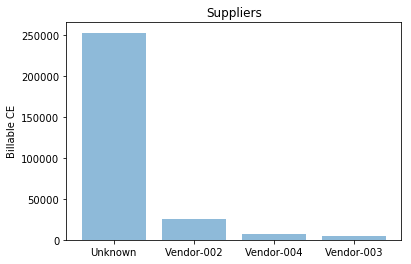

In [21]:
plt.rcdefaults()
 
Suppliers = ('Unknown', 'Vendor-002', 'Vendor-004', 'Vendor-003')
y_pos = np.arange(len(Suppliers))
Billable_CE = [252586.57,25639.91,6942.37,5132.16]
 
plt.bar(y_pos, Billable_CE, align='center', alpha=0.5)
plt.xticks(y_pos, Suppliers)
plt.ylabel('Billable CE')
plt.title('Suppliers')
 
plt.show()

## f) Which is the Project with a maximum number of Billable CE hours per day delivered per developer?





In [52]:
calendar=pd.read_csv('Calendar.csv')
filtered_data=calendar.groupby(['Project'],as_index=False).agg({'Billable CE':'sum'})
filtered_data=filtered_data.sort_values(by=['Billable CE'], ascending=[False]).head(1)
filtered_data

,Project,Billable CE
162,Project 91,18953.76


## g)) What is the difference on the total Actual CE delivered between July and August in Country 17?

In [71]:
calendar=pd.read_csv('Calendar.csv')
calendar['Date']=pd.to_datetime(calendar['Date'])
filtered_data=calendar[(calendar['Date']>='2017-07-01')]
filtered_data=filtered_data[filtered_data['Date']<='2017-07-31']
filtered_data=filtered_data[filtered_data['Country']=='Country 17']
Actual_CE_July=filtered_data['Actual CE'].sum()

In [72]:
Actual_CE_July

19316.100000000002

In [73]:
calendar=pd.read_csv('Calendar.csv')
calendar['Date']=pd.to_datetime(calendar['Date'])
filtered_data=calendar[(calendar['Date']>='2017-08-01')]
filtered_data=filtered_data[filtered_data['Date']<='2017-08-31']
filtered_data=filtered_data[filtered_data['Country']=='Country 17']
Actual_CE_August=filtered_data['Actual CE'].sum()

In [74]:
Actual_CE_August

17489.239999999965

Difference between August's Actual CE and July's Actual_CE

In [75]:
print(Actual_CE_July-Actual_CE_August)

1826.860000000037


## h) What is the total number of developers in each one of the last 3 months for Vendor-002?

In [99]:
calendar=pd.read_csv('Calendar.csv')

Let's filter out the data for only Vendor-002

In [100]:
filtered_data_vendor002=calendar[calendar['Supplier']=='Vendor-002']

In [101]:
filtered_data_vendor002['Date']=pd.to_datetime(filtered_data_vendor002['Date'])

Let's find max date so that we can filter date based on last 3 months

In [102]:
filtered_data_vendor002['Date'].max()

Timestamp('2017-12-08 00:00:00')

In [103]:
filtered_data=filtered_data_vendor002[(filtered_data_vendor002['Date']>='2017-06-01') & (filtered_data_vendor002['Date']<='2017-08-31') ]

In [104]:
filtered_data=filtered_data.groupby(['Developer ID'],as_index=False).agg({'Billable CE':'sum'})

In [116]:
pd.DataFrame(filtered_data['Developer ID']).head()

,Developer ID
0,Developer 75684
1,Developer 75695
2,Developer 75696
3,Developer 75724
4,Developer 75726


In [114]:
print('Total number of developers past 3 months from June to July are:',filtered_data.shape[0])

Total number of developers past 3 months from June to July are: 366
